# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [341]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [342]:
df_main = pd.read_csv("/content/Loan_Modelling.csv")

In [343]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Data Overview

* Observations
* Sanity checks

### View the first and last 5 rows of the dataset.



In [344]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [345]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


 * The ID column is containing unique values.

### Understand the shape of the dataset.

In [346]:
data.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns.

### Check the data types of the columns for the dataset.

In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the columns are numeric in nature.

### Checking for missing values

In [348]:
# checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no null values in the dataset

### Dropping the duplicate values

In [349]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data.

### Dropping the columns with all unique values

In [350]:
data.ID.nunique()

5000

* The ID column contains only unique values, so we can drop it.

In [351]:
data = data.drop(["ID"], axis=1)

### Checking the Statistical Summary

In [352]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.10460,11.46795,-3.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
ZIPCode,5000.00000,93169.25700,1759.45509,90005.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Education,5000.00000,1.88100,0.83987,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000
Personal_Loan,5000.00000,0.09600,0.29462,0.00000,0.00000,0.00000,0.00000,1.00000
Securities_Account,5000.00000,0.10440,0.30581,0.00000,0.00000,0.00000,0.00000,1.00000


* Min age is 23 and the maximum age is 67.
* Min experience is -3 and max is 43. Min exp does not look correct. We will look into it further.
* Min income is 8 and max is 224. Few people have income at the higher end.
* Member in a family is min 1 and max 4
* CCAvg is min 0 and max 10. 75% of those values are within 2.5
* Mortgage is min 0 and max 635. 75% of the values lie within 101.

## Data Preprocessing

### Checking for Anomalous Values

In [353]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [354]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [355]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [356]:
data["Education"].unique()

array([1, 2, 3])

### Feature Engineering

Let's find out whether the ZIPCode column is useful for our analysis or not.

In [357]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

There are 467 unique ZIPCode values for 5000 customers.So there are repetition values of ZIPCode and completely ignoring the column may not be correct. We are trying to find out the unique values of ZIPCode by considering the first two digits of it.

In [358]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]
data["ZIPCode"] = data["ZIPCode"].astype("category")


Number of unique values if we take first two digits of ZIPCode:  7


Note, that Zipcode although is a numeric-only field the data is categorical; since numbers on zip code translate to a physical area and not any numerical attribute.
We have updated the zipcode column with the first two digits of the postal code. This will allow our model to be driven by US states instead of customer addresses which would be too granular for our model. Without this treatment, the number of dummy variables for this column would have been a much greater number resulting in an inefficient model.

In [359]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

**The below functions need to be defined to carry out the Univariate analysis.**

In [361]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [362]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Let's see the distribution of numerical columns**

#### Observations on Age

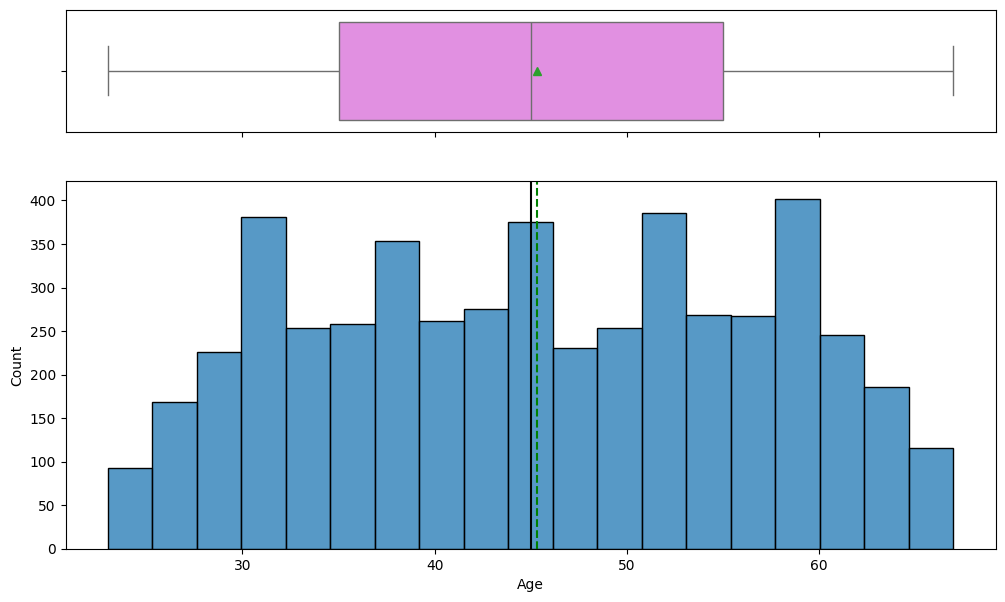

In [363]:
histogram_boxplot(data, "Age")
plt.savefig("output.jpg", bbox_inches='tight')

* The Age distribution looks very slightly right-skewed with a mean age slightly more than around 45 years.
* There is no outlier present.

#### Observations on Experience

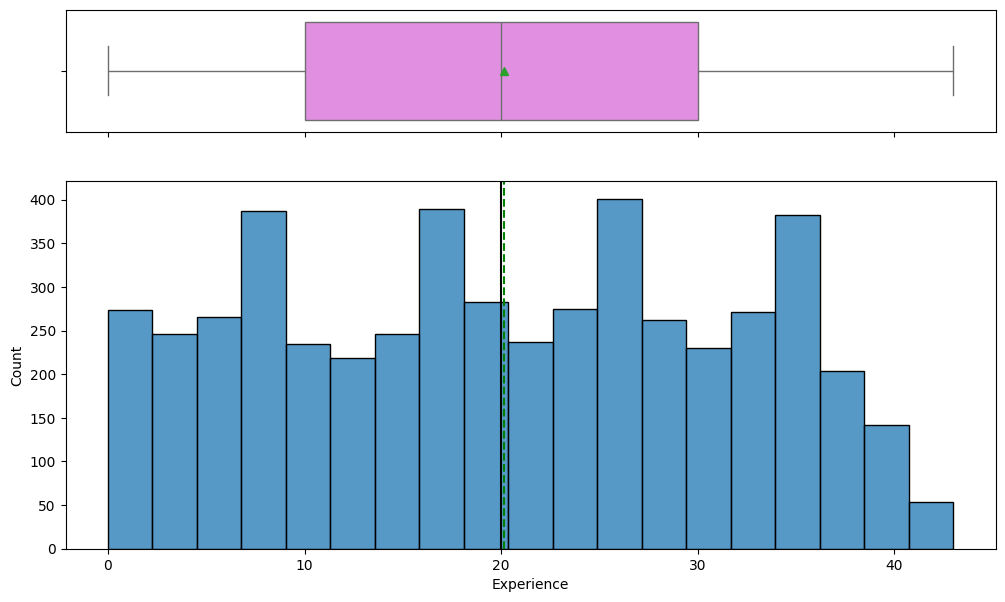

In [364]:
histogram_boxplot(data, "Experience")
plt.savefig("output.jpg", bbox_inches='tight')

* The Experience distribution looks normal with a mean 20 years of experience.
* There is no outlier present.

#### Observations on Income

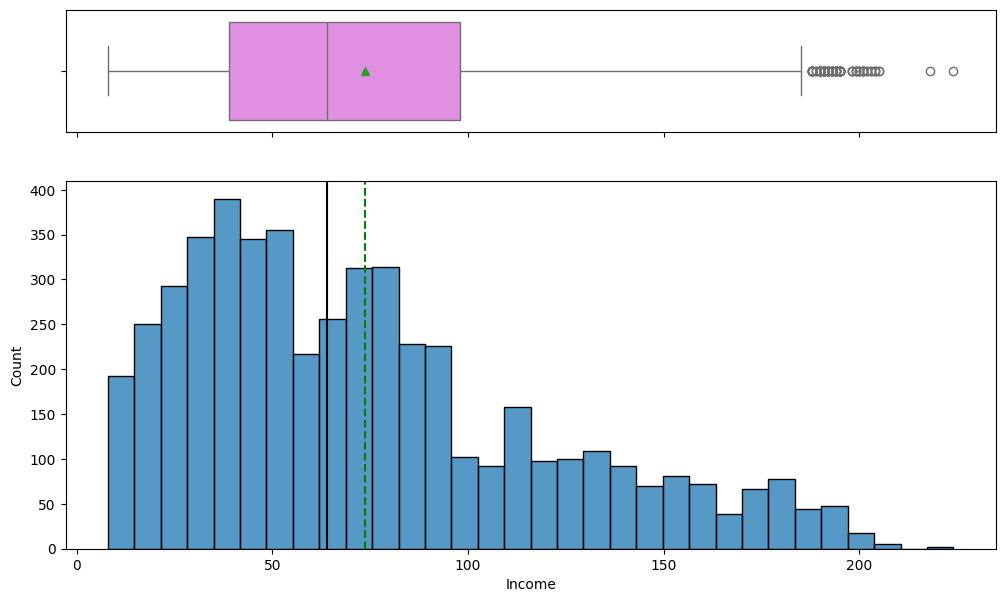

In [365]:
histogram_boxplot(data, "Income")
plt.savefig("output.jpg", bbox_inches='tight')

 * The distribution of Income is right-skewed with a mean income of around 74 thousand dollars and a median Income is 64 thousand dollars. 75% of the customers have income equal to or less than 98 thousand dollars. There are few customers whose income is on the higher side.

 * Outliers are present in the upper quartile.

#### Observations on CCAvg

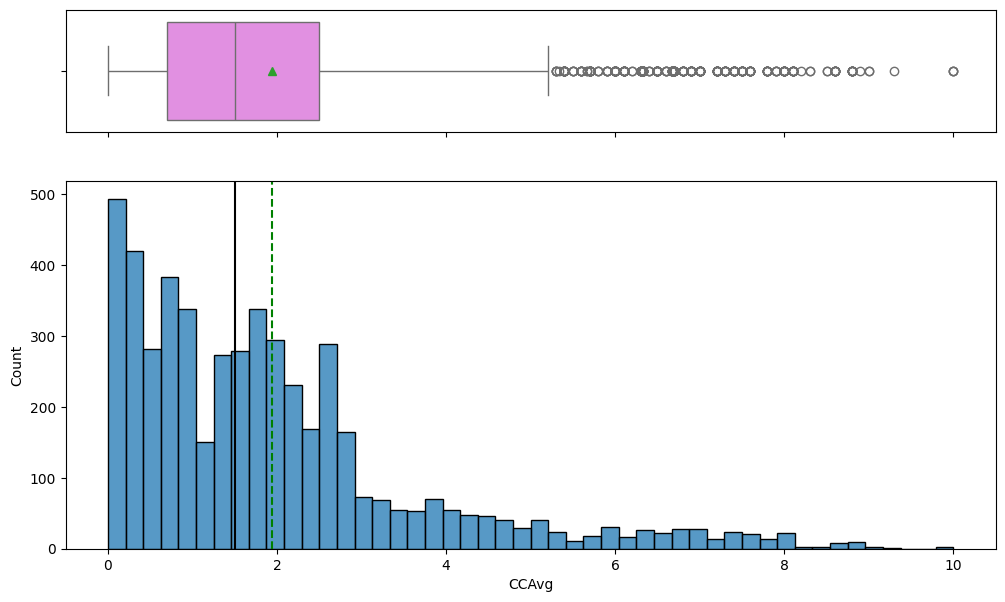

In [366]:
histogram_boxplot(data, "CCAvg")
plt.savefig("output.jpg", bbox_inches='tight')

 * The distribution of CCAvg is highly right-skewed with a mean CCAvg of around 2 thousand dollars and a median CCAvg is 1.5 thousand dollars. 75% of the customers have CCAvg equal to or less than 2.5 thousand dollars. There are few customers whose average spending on credit cards per month(CCAvg) is on the higher side.
 * The max value for it is 10 thousand dollars.

 * Many outliers are present in the upper quartile.

#### Observations on Mortgage

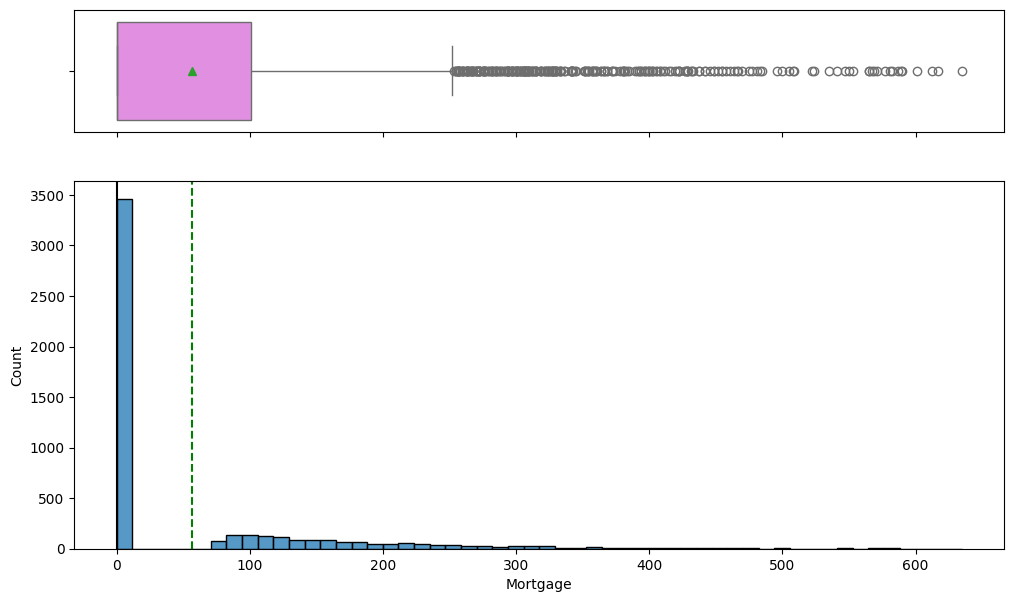

In [367]:
histogram_boxplot(data, "Mortgage")
plt.savefig("output.jpg", bbox_inches='tight')

 * Almost 3500 customers have no mortgage.
 * Among the customers that have mortgages the values range from around 60 thousand dollars to around 630 thousand dollars.
 * Mortgage values of customers are right-skewed.
 * Few customers have higher mortgage values.
 * Mortgage values of more than 280 thousand dollars can be considered outliers.

#### Observations on Family

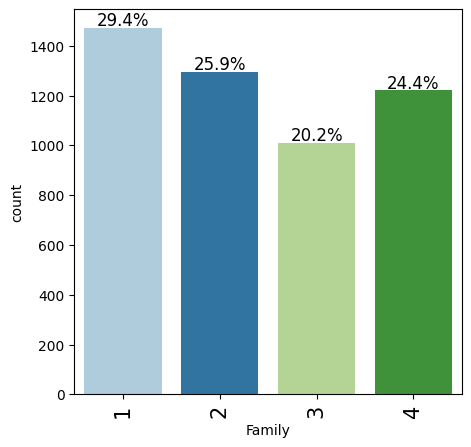

<Figure size 640x480 with 0 Axes>

In [368]:
labeled_barplot(data, "Family", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Most of the customers have family size 1, followed by family sizes 2,4, and 3.


**Let's see the distribution of categorical columns**

#### Observations on Education

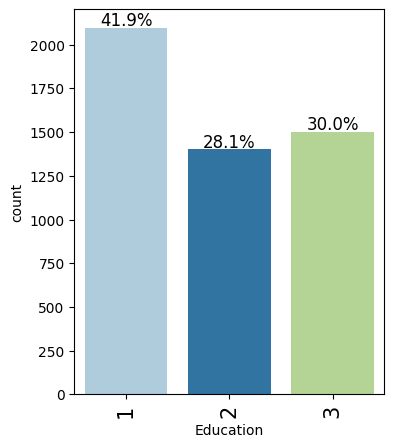

<Figure size 640x480 with 0 Axes>

In [369]:
labeled_barplot(data, "Education", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')


* Most of the customers have education level 1(undergrad), followed by education level 3(advanced/professional), and education level 2(graduate).

#### Observations on Securities_Account

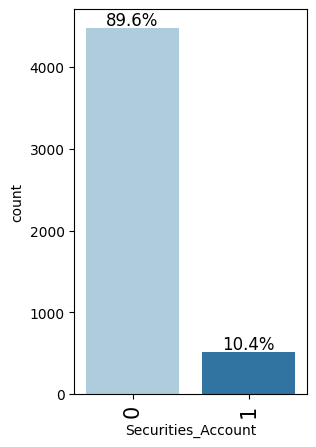

<Figure size 640x480 with 0 Axes>

In [370]:
labeled_barplot(data, "Securities_Account", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Most of the customers do not have securities account with the bank.

* Only 10.4% of customers have securities account with the bank.


#### Observations on CD_Account

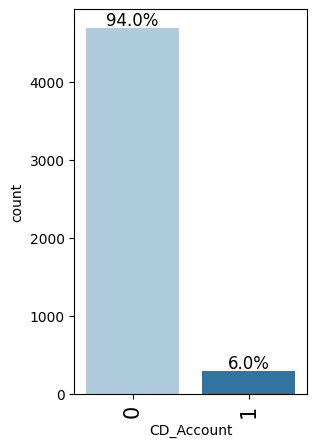

<Figure size 640x480 with 0 Axes>

In [371]:
labeled_barplot(data, "CD_Account", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

 * 94% of customers do not have a certificate of deposit (CD) account with the bank.

#### Observations on Online

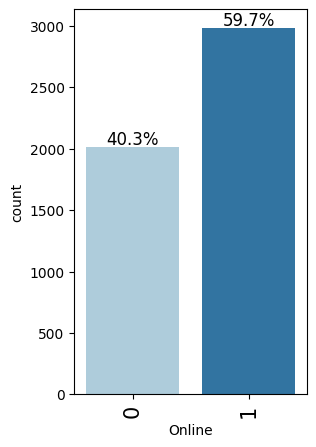

<Figure size 640x480 with 0 Axes>

In [372]:
labeled_barplot(data, "Online", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Around 60% of the customers use Internet banking facilities.

#### Observation on CreditCard

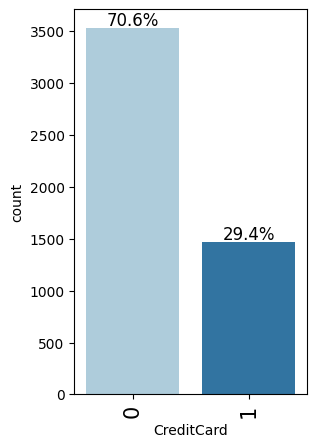

<Figure size 640x480 with 0 Axes>

In [373]:
labeled_barplot(data, "CreditCard", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

 * Most of the (71%) customers do not use a credit card issued by any other Bank (excluding All Life Bank).

#### Observation on ZIPCode

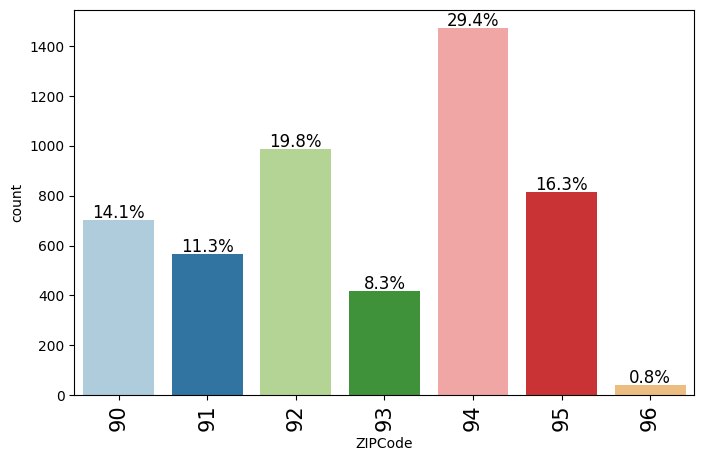

<Figure size 640x480 with 0 Axes>

In [374]:
labeled_barplot(data, "ZIPCode", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Almost 50% of the customers  come from  zip code areas which start with 94 and 92.


#### Observation on Personal_Loan

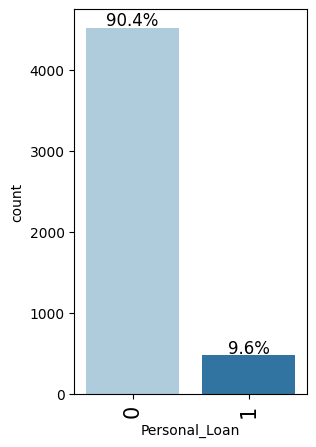

<Figure size 640x480 with 0 Axes>

In [375]:
labeled_barplot(data, "Personal_Loan", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* 90.4% of the customers did not accept the personal loan offered in the last campaign.

### Bivariate Analysis

**The below functions need to be defined to carry out the Bivariate analysis.**

In [376]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [377]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation check

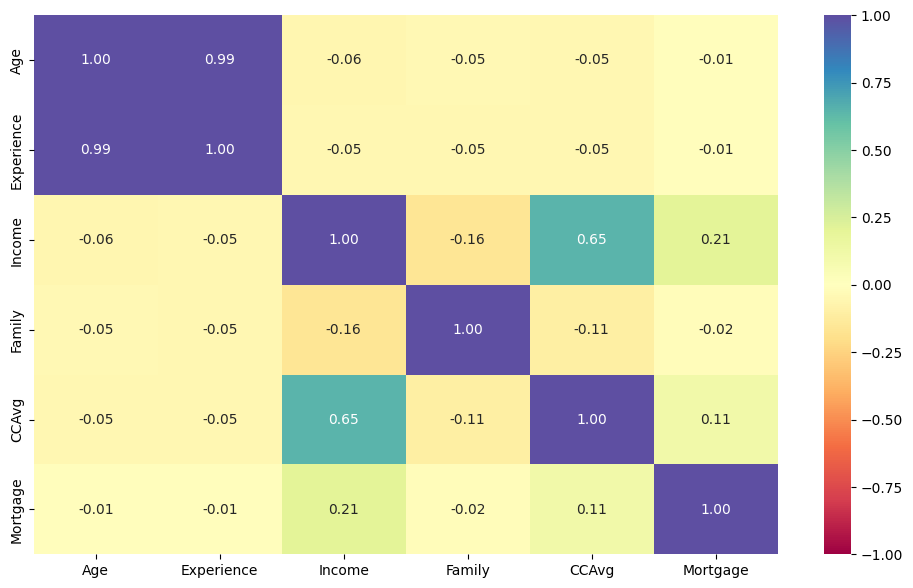

<Figure size 640x480 with 0 Axes>

In [378]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

 * There's a hightly positive correlation between the Age and the Experience.
 * There's a positive correlation between CCAvg and Income.
 * There's a sligtly positive correlation between Mortgage and Income.
 * There's a sligtly positive correlation between Mortgage and CCAvg.
 * There's a slightly negative correlation between Income and Family.It should be vice versa so we need it look into it.
 * There's a slightly negative correlation between Income and CCAvg.
 * No other variables are correlated. We will analyze it further.

#### Observation on Personal Loan vs Age

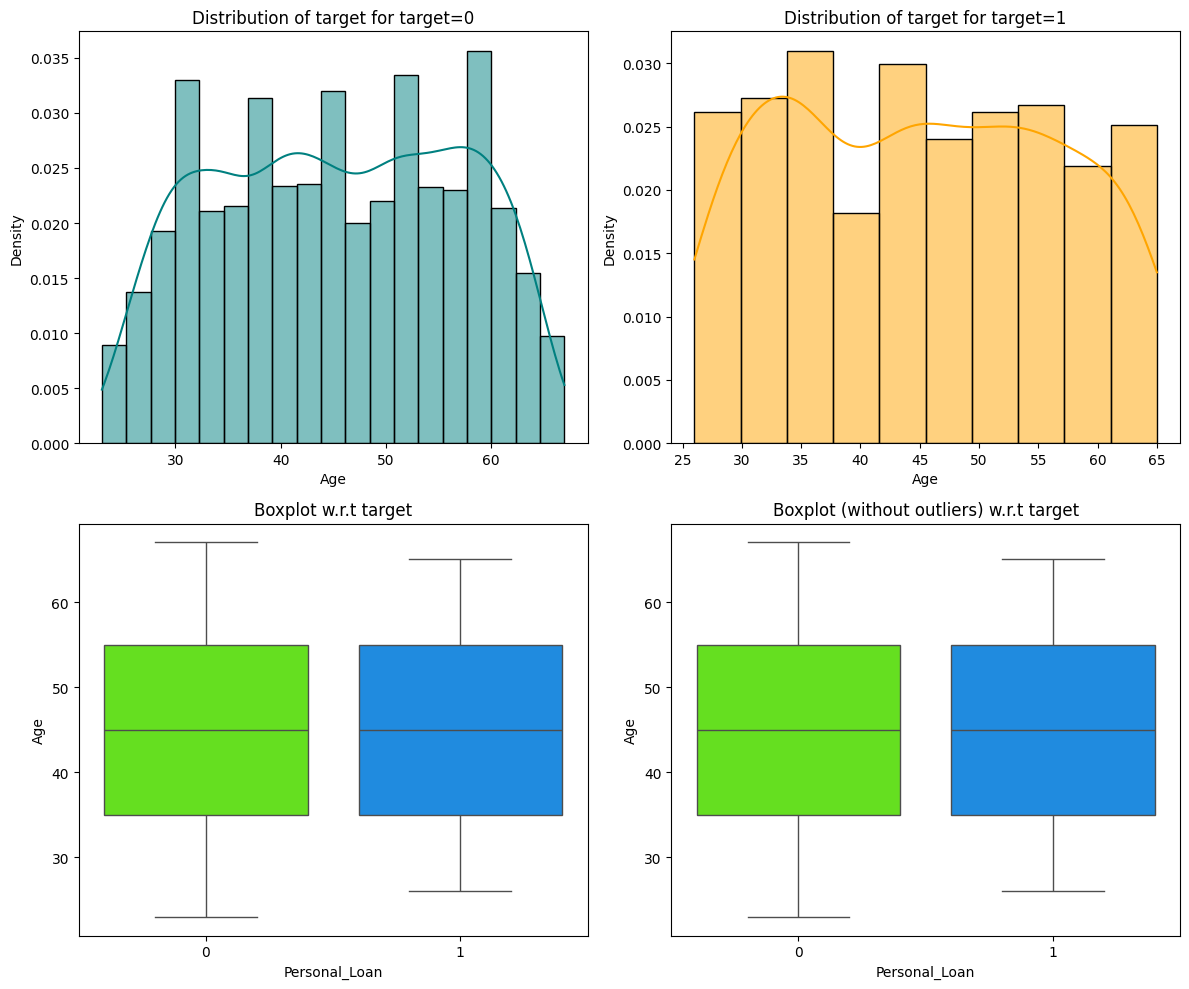

<Figure size 640x480 with 0 Axes>

In [379]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")
plt.savefig("output.jpg", bbox_inches='tight')

* The variance of the Age of the customers who are interested in taking the loans is smaller as compared to the variance of the Age of the customers who are not interested.
* The customers who took the loan are in the lesser age group.

#### Observation on Personal Loan vs Experience

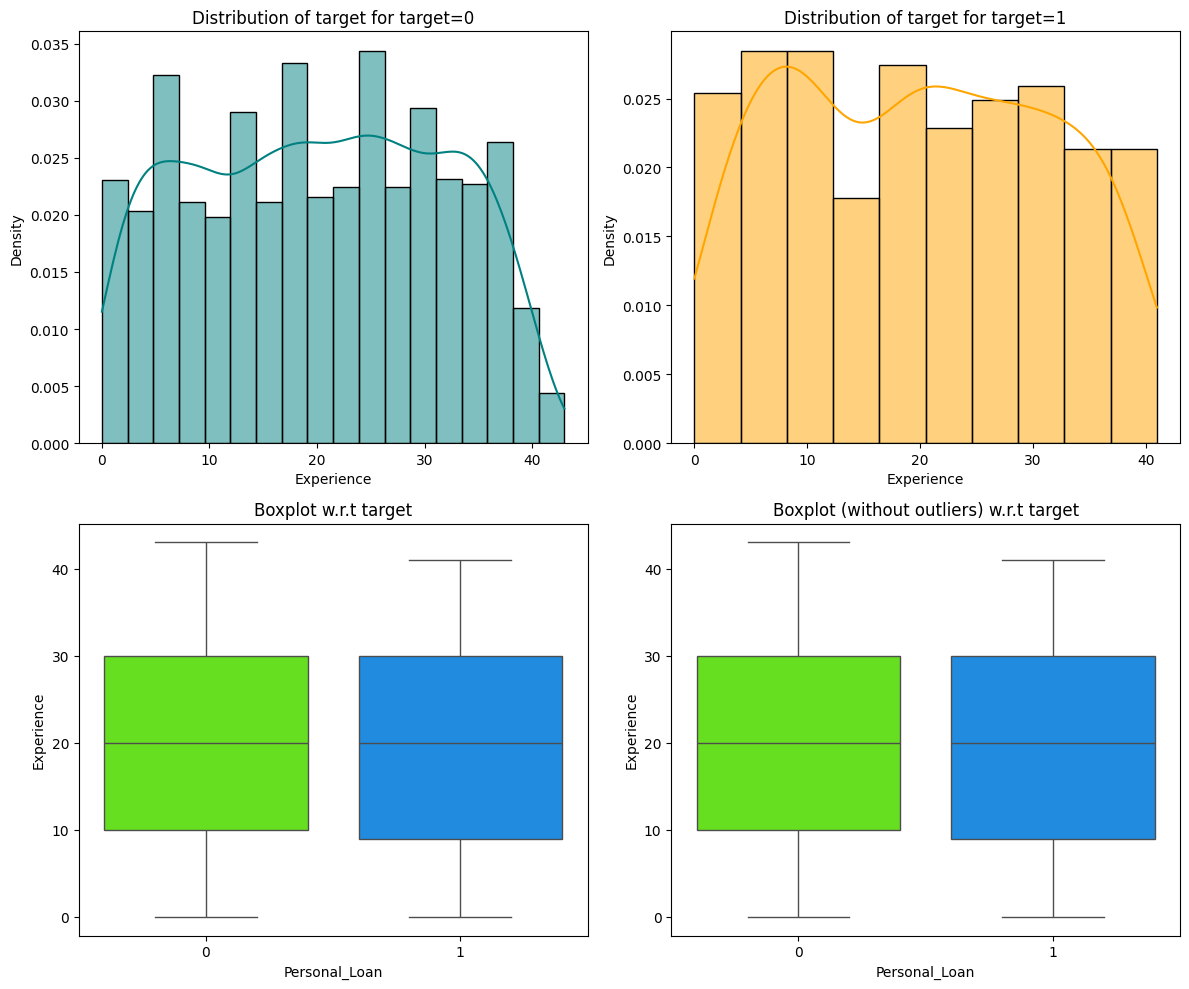

<Figure size 640x480 with 0 Axes>

In [380]:
distribution_plot_wrt_target(data, "Experience","Personal_Loan")
plt.savefig("output.jpg", bbox_inches='tight')

*
The variance of the Experience of the customers who are interested in taking the loans is smaller as compared to the variance of the Experience of the customers who are not interested.
* There is no distinct difference in the values of Personal loans and Experience.

####Observation on Personal Loan vs Income

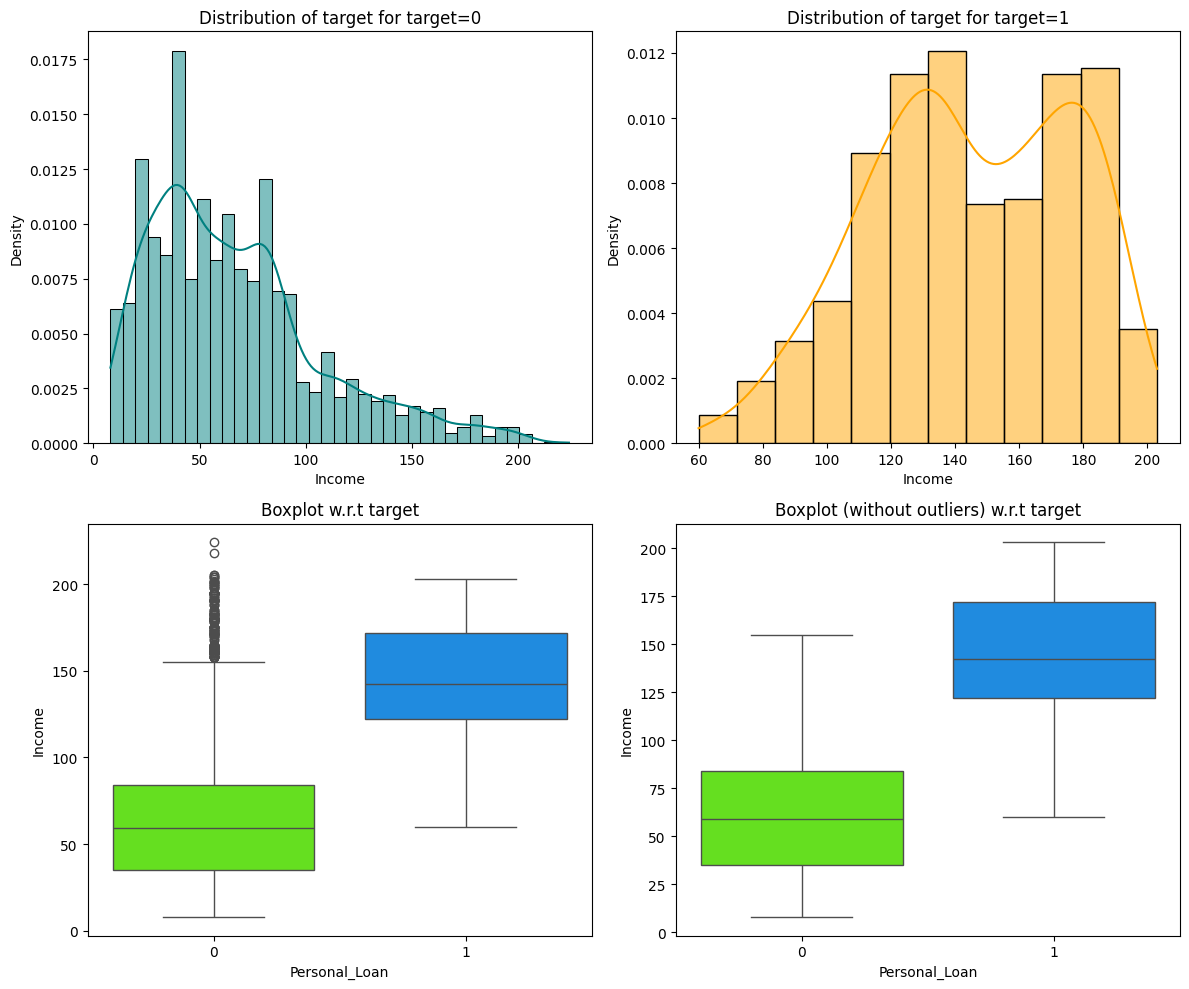

<Figure size 640x480 with 0 Axes>

In [381]:
distribution_plot_wrt_target(data, "Income","Personal_Loan")
plt.savefig("output.jpg", bbox_inches='tight')

*
 There is a clear boundary showing the separation of Loan acceptance i.e. the customers who took the loan offered in the last campaign and who did not take based on the values of Income.
* Customers with higher Income are more interested in taking the loan as compared to the customers whose income is less.

* Few outliers are present in the graph which shows that there are some customers whose Income is on the higher side but who did not take the loan.

* The median value of the Income for the customers who took the loan and who did not take the loan is around 53 and 145 thousand dollars respectively.


####Observation on Personal Loan vs CCAvg

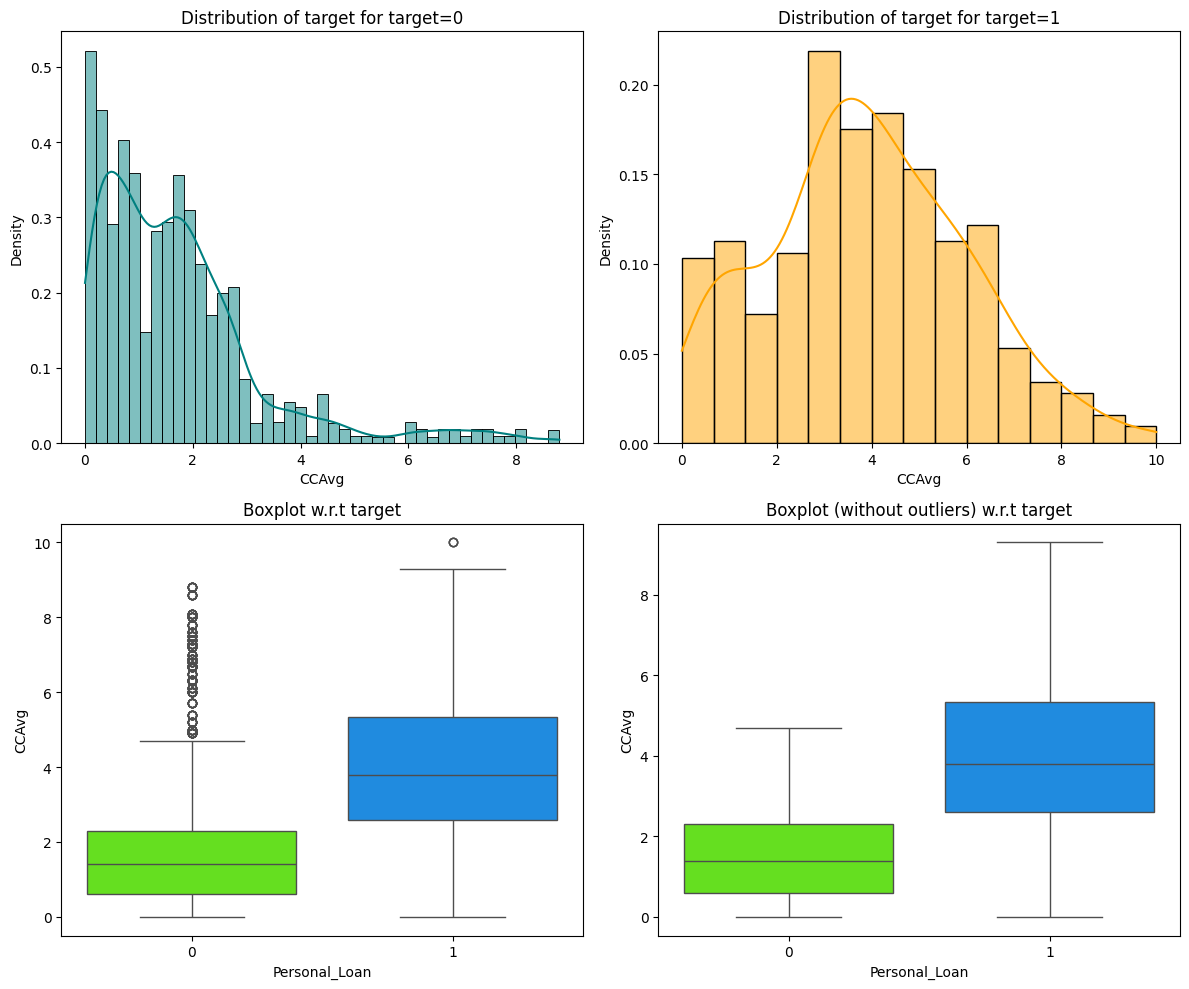

<Figure size 640x480 with 0 Axes>

In [382]:
distribution_plot_wrt_target(data, "CCAvg","Personal_Loan")
plt.savefig("output.jpg", bbox_inches='tight')

* There is a clear boundary showing separation of Loan acceptance i.e. the customers who took the loan and who did not take based on the values of CCAvg.
* Customers with a higher CCAvg are more interested in taking the loan as compared to the customers whose CCAvg is less. It sounds logical. If customers' average spending on credit cards per month is much they need more money and so they end up taking bank loans.

* A few outliers are present in the graph which shows that there are some customers whose average spending on credit cards per month is on the higher side but they are not interested in or cannot afford taking the loan.

* The median value of the CCAvg for the customers who took the loan and who did not take the loan is around 1.2 and 3.6 thousand dollars respectively.


#### Observation on Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


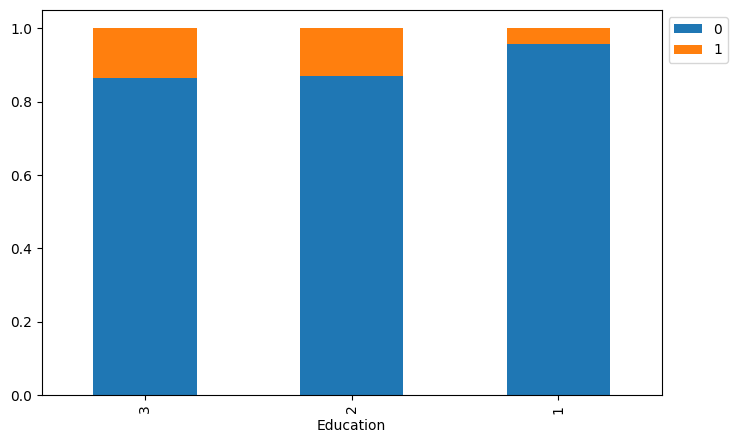

<Figure size 640x480 with 0 Axes>

In [383]:
stacked_barplot(data, "Education", "Personal_Loan")
plt.savefig("output.jpg", bbox_inches='tight')

* It can be seen from the graph that the customers with Education Level: 2 (Graduates) and Education Level: 3(Advanced/Professionals)are more interested in taking loans than the customers with Education Level: 1 (Undergrads)

####Observation on Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


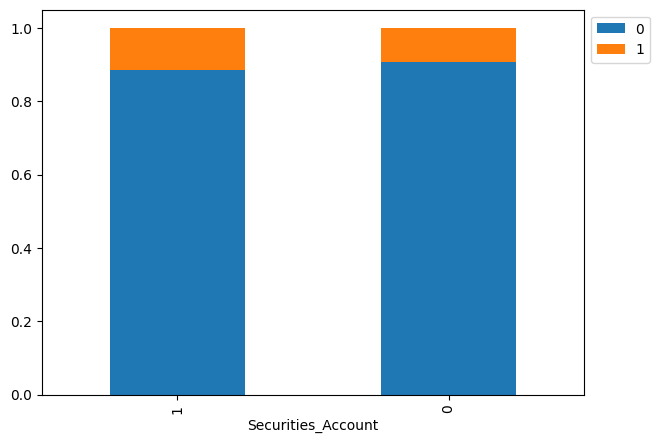

<Figure size 640x480 with 0 Axes>

In [384]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")
plt.savefig("output.jpg", bbox_inches='tight')

* Around 90% of the customers who took the loan offered in the last campaign does not have securities account with the bank.

####Observation on Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


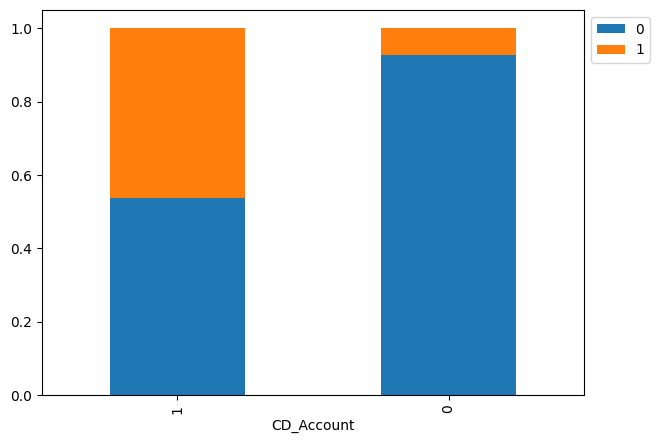

<Figure size 640x480 with 0 Axes>

In [385]:
stacked_barplot(data, "CD_Account", "Personal_Loan")
plt.savefig("output.jpg", bbox_inches='tight')

*  Among all the customers who took the loan, 70% of them does not have a certificate of deposit (CD) account with the bank.

####Observation on Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


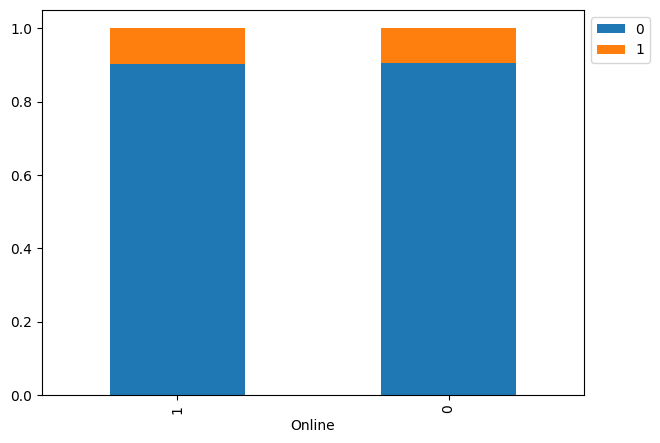

<Figure size 640x480 with 0 Axes>

In [386]:
stacked_barplot(data, "Online", "Personal_Loan")
plt.savefig("output.jpg", bbox_inches='tight')

* Among all the customers who use internet banking facilities, 9.8% of them took the loan offered in the last campaign.


####Observation on Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


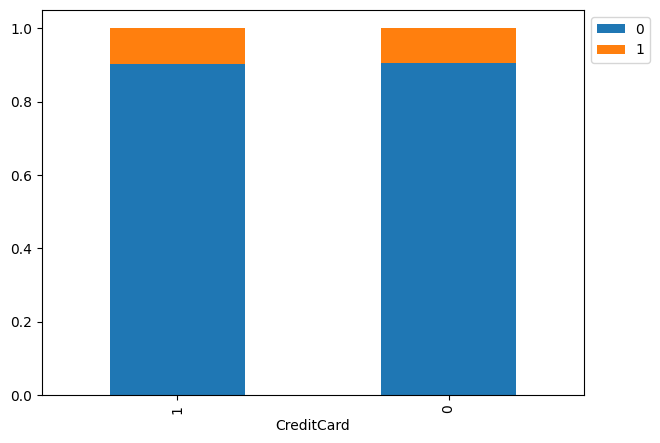

<Figure size 640x480 with 0 Axes>

In [387]:
stacked_barplot(data, "CreditCard", "Personal_Loan")
plt.savefig("output.jpg", bbox_inches='tight')

* The customers who took the Personal Loan offered in the last campaign, around 3% of them use a credit card issued by any other Bank (excluding All Life Bank).
* 1470 customers have credit cards.

####Observation on Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


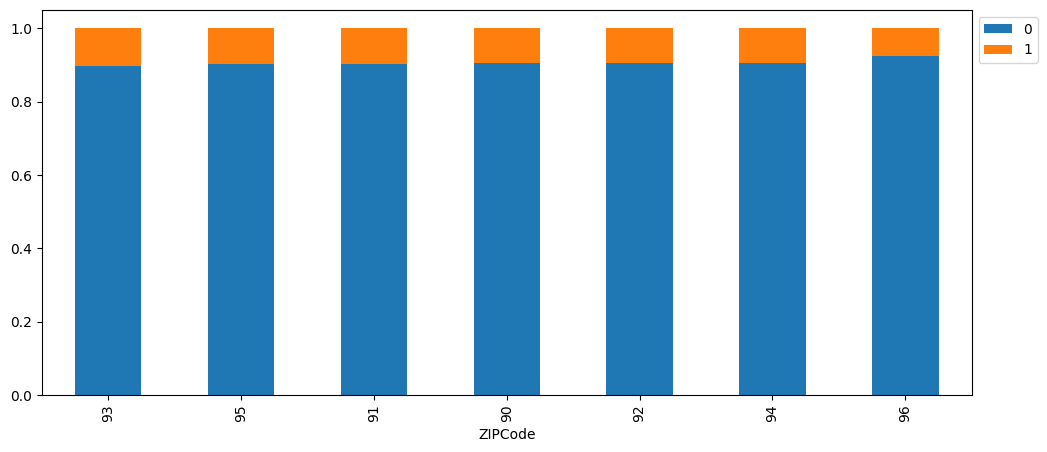

<Figure size 640x480 with 0 Axes>

In [388]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")
plt.savefig("output.jpg", bbox_inches='tight')

Among all the customers who took the loan(480 customers), 138 customers are from the area with the ZIPCode starting with 94.

##Data Preprocessing

####Outlier Detection

**Let's visualize all the outliers present in data together**

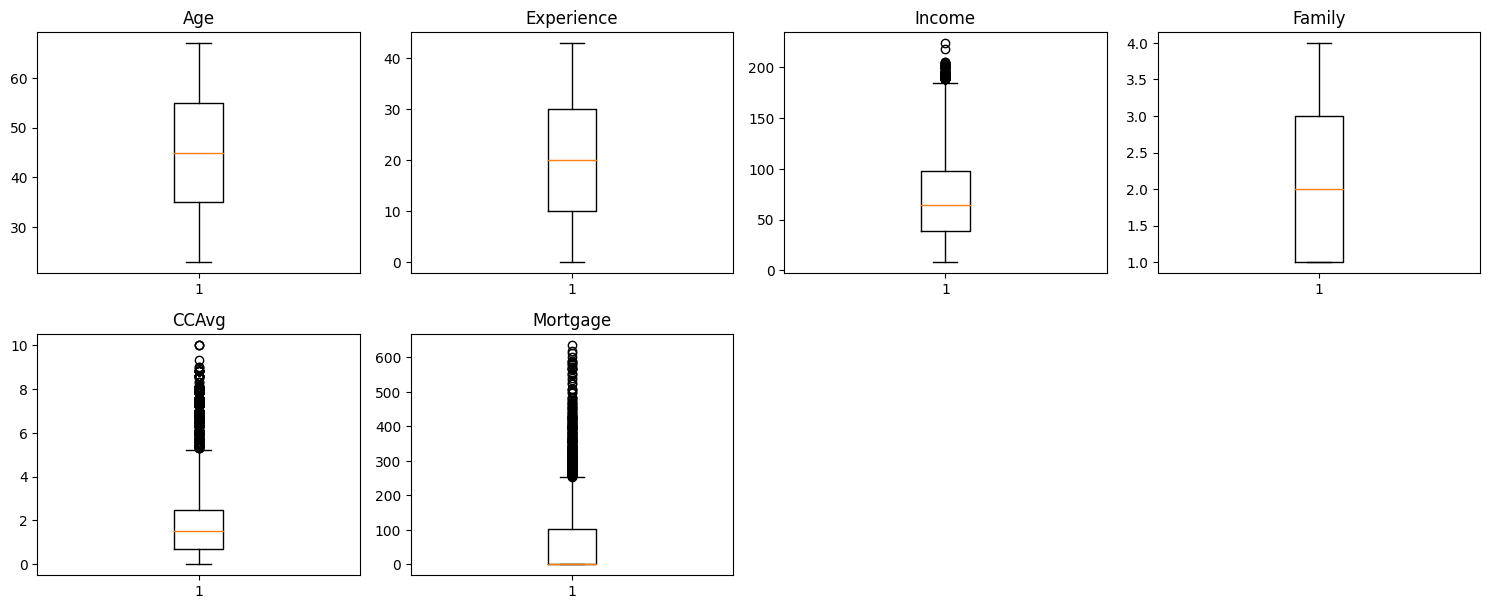

In [389]:
# outlier detection using boxplot
# Select numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Let's find the percentage of outliers, in each column of the data, using IQR.**

In [390]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [391]:
# Percentage of outliers in each column
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100

Age          0.00000
Experience   0.00000
Income       1.92000
Family       0.00000
CCAvg        6.48000
Mortgage     5.82000
dtype: float64

* We can see that all the numerical features in the data set have outliers present in them.
* However, we will not treat them as they are proper values.

### Data Preparation for Modeling

In [392]:
#dropping the target variable
X = data.drop(["Personal_Loan"], axis=1)
Y = data["Personal_Loan"]

#as other categorical variables' values are already in 0's and 1's, so we are converting only ZIPCode and Education categorical variables to dummy variables.
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [393]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 18)
Shape of test set :  (1500, 18)
Percentage of classes in training set:
Personal_Loan
0   0.90543
1   0.09457
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0   0.90067
1   0.09933
Name: proportion, dtype: float64


*
We had seen that around 91% of observations belong to class 0 (customer does not accept loan) and 9% of observations belong to class 1 (customer accepts loan), and this is preserved in the train and test sets.

## Model Building

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [394]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [395]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Model Evaluation Criterion

The objective of this data analysis is to identify the customers who have a high probability of taking loans from the bank.
To that effect, the models that we would build can give the following two incorrect predictions:
  *   Identifies a customer as a potential loan applicant who in reality will not be taking loans.
      In this False Positive scenario, our model will encourage business stakeholders to target customers via marketing and customer outreach programs to encourage taking loans. All the investments made toward customers will not yield any results and will translate directly to financial loss.     
      Note that Precision metric will have to be tuned in our model, to decrease the FPs.
      The cost of such financial loss is not defined in our business case and may not be significant if customers are collectively targeted in certain batches.   

  * Identifies a customer with a low probability of taking loans who in reality will be open to taking loans from the bank.   
      In this False Negative scenario, our model will filter out customers who would have taken loans and hence these customers will not be targeted by the bank's marketing/outreach schemes. This is a more harmful scenario for the business since these customers directly translate to building financial assets.
      The cost of filtering out potential revenue sources is greater than the cost of incorrectly identifying revenue sources.       
      Note that Recall metric will have to be tuned in our model, to decrease the FNs.

Also given that the activity is to identify the sources for asset development we will have to consider the recall metric to gather the best results from this activity.


## Decision Tree (Basic Model)

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [396]:
model1 = DecisionTreeClassifier(criterion="gini", random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Scoring our Decision Tree

In [397]:
print("Accuracy on training set : ",model1.score(X_train, y_train))
print("Accuracy on test set : ",model1.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9866666666666667


In [398]:
#Checking number of positives
Y.value_counts(1)

Personal_Loan
0   0.90400
1   0.09600
Name: proportion, dtype: float64

The ratio of positives to negatives is 1:9, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

#### Checking model performance on training data

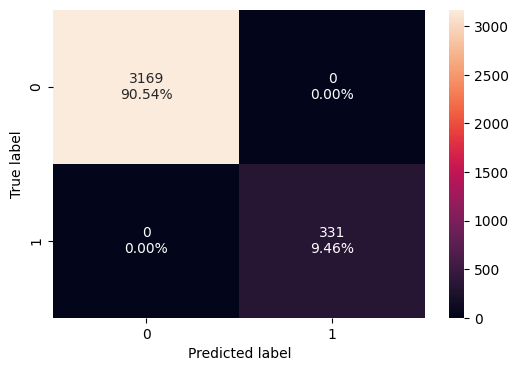

In [399]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [400]:
decision_tree_perf_train_basicmodel = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train_basicmodel

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


#### Checking model performance on test data

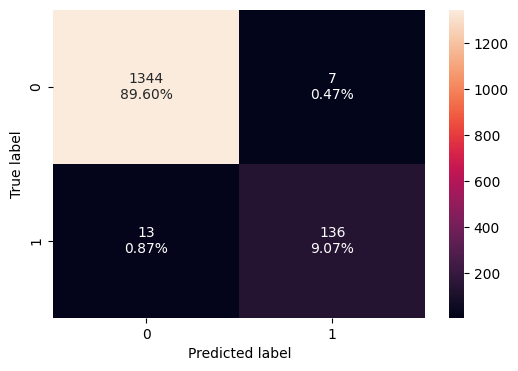

In [401]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [402]:
decision_tree_perf_test_basicmodel = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test_basicmodel

,Accuracy,Recall,Precision,F1
0,0.98667,0.91275,0.95105,0.93151


#### Visualizing the Decision Tree

In [403]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


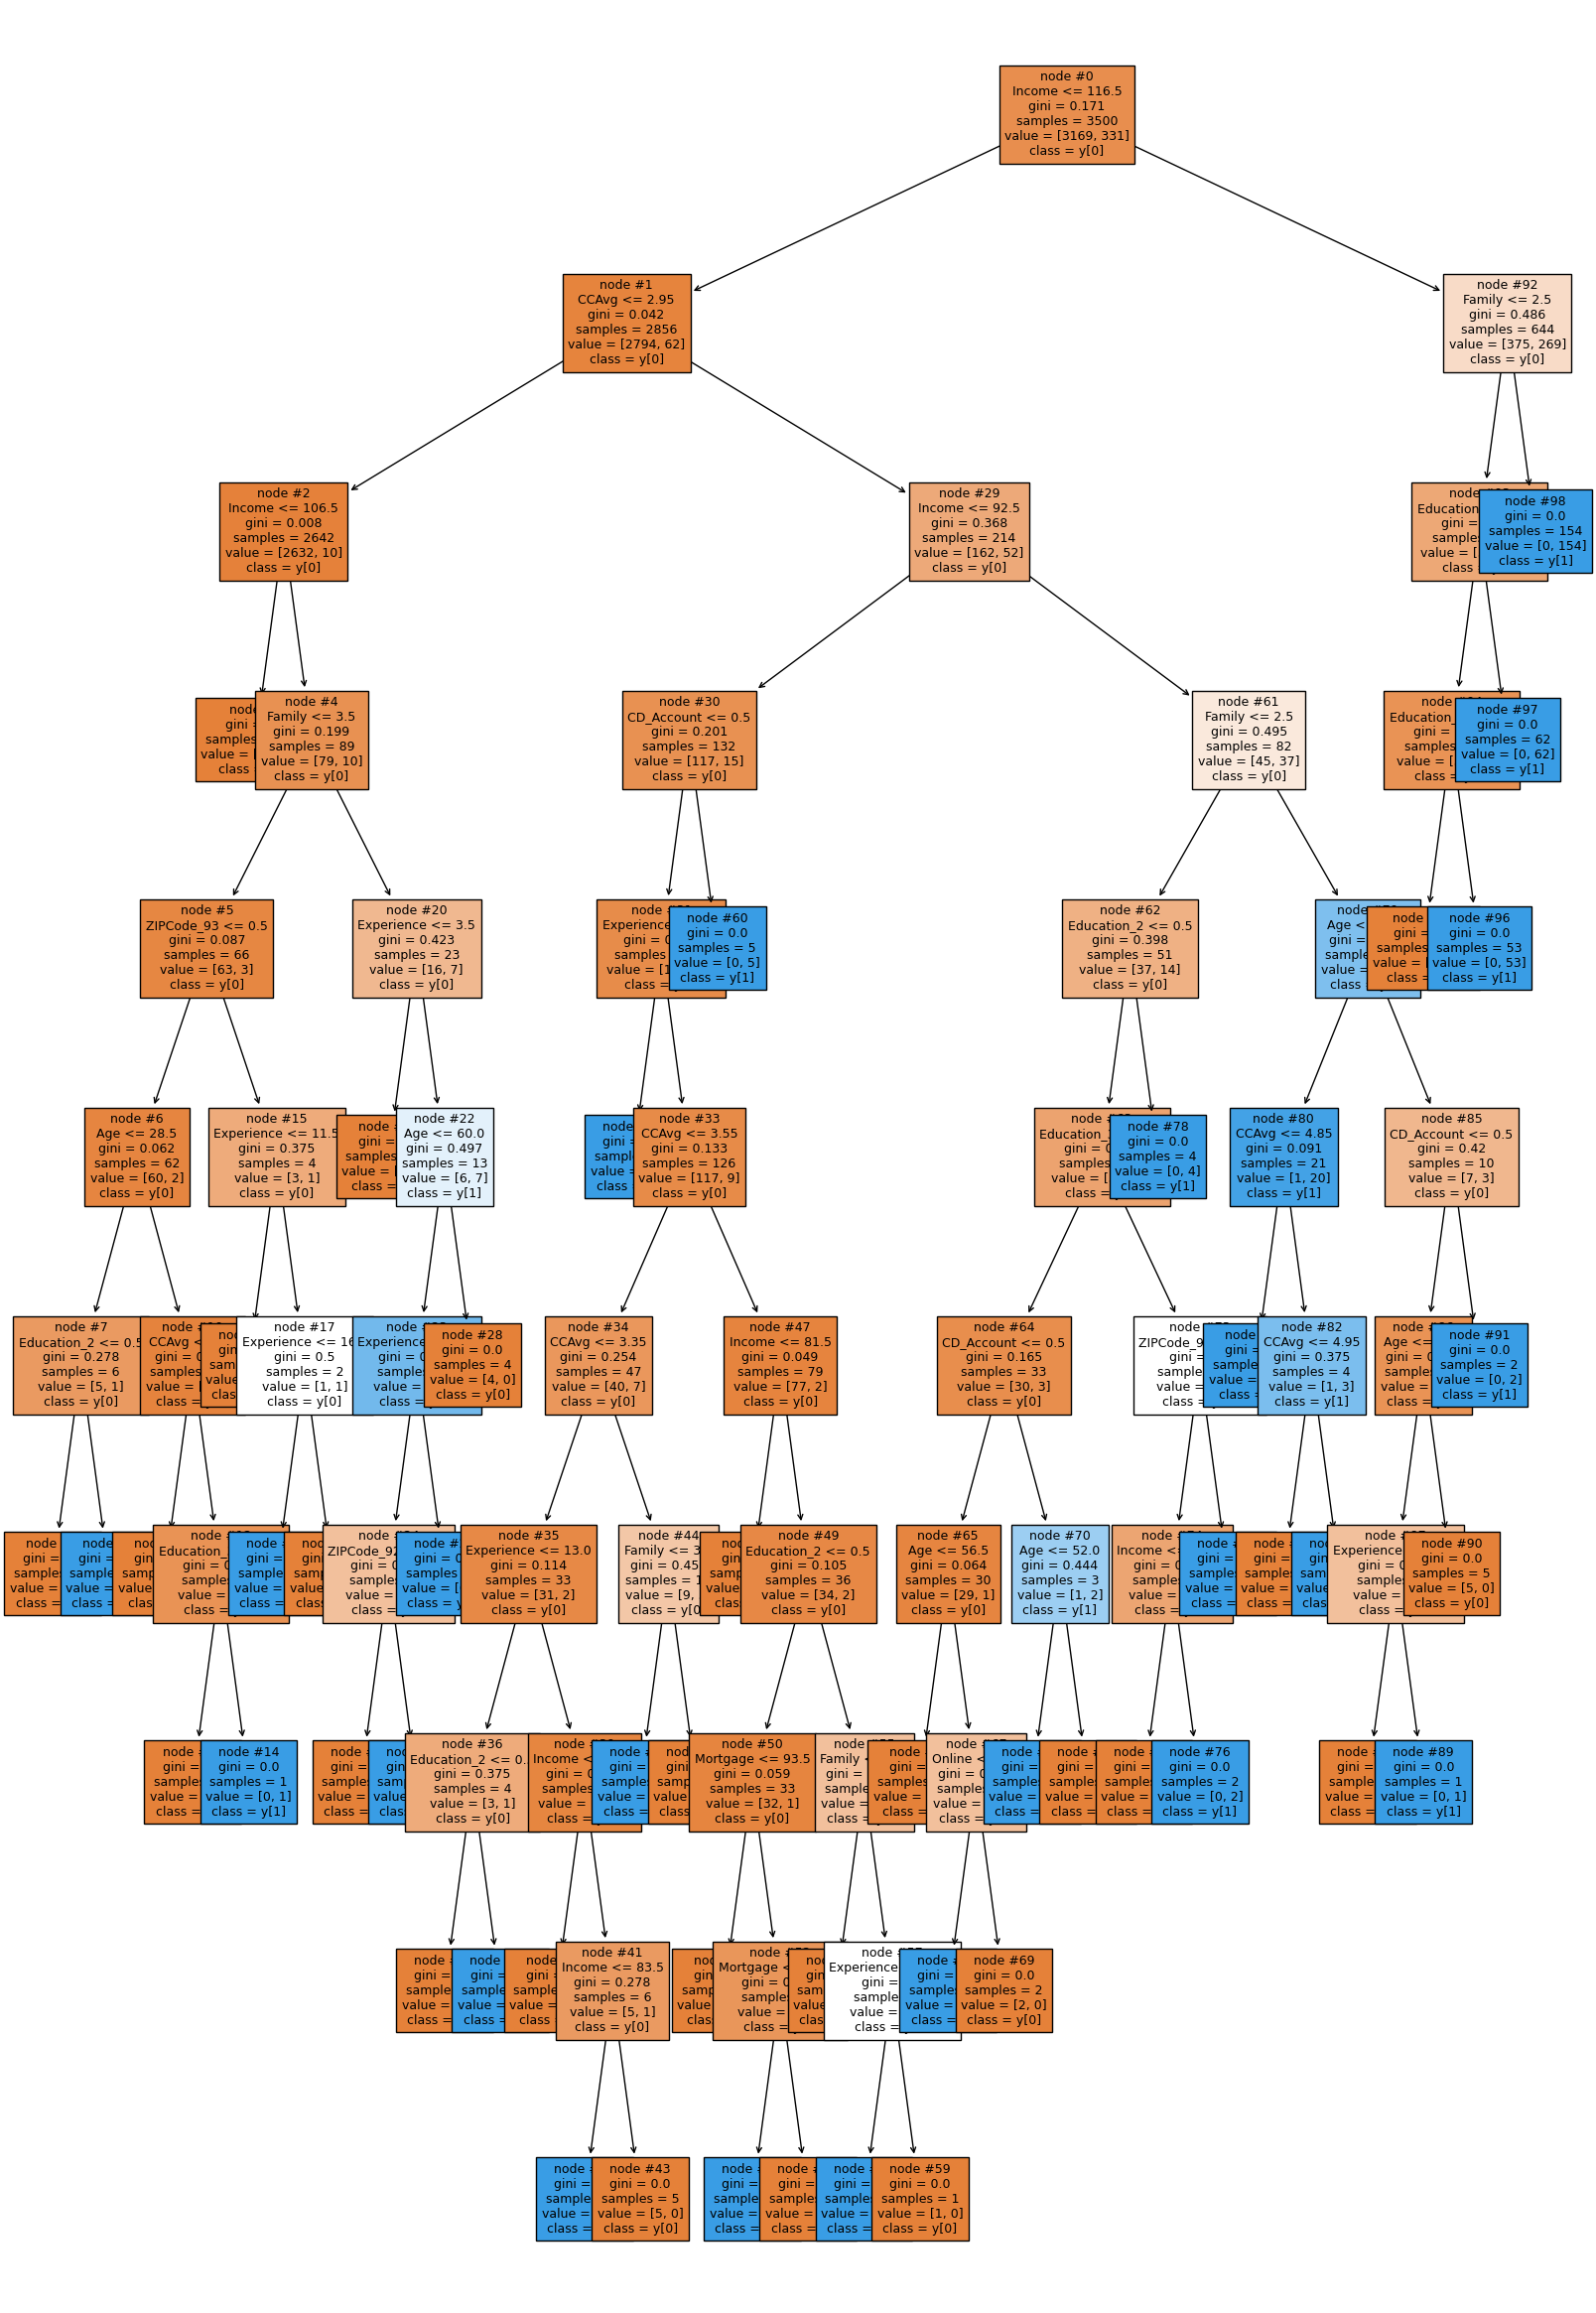

In [404]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [405]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Experience <

####Let's find out important features in the tree building

In [406]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp
Income             0.30643
Family             0.25814
Education_2        0.16869
Education_3        0.14713
CCAvg              0.04572
CD_Account         0.02136
Age                0.01953
Experience         0.01823
ZIPCode_94         0.00649
Mortgage           0.00324
Online             0.00222
ZIPCode_92         0.00222
ZIPCode_93         0.00059
Securities_Account 0.00000
ZIPCode_91         0.00000
ZIPCode_95         0.00000
ZIPCode_96         0.00000
CreditCard         0.00000


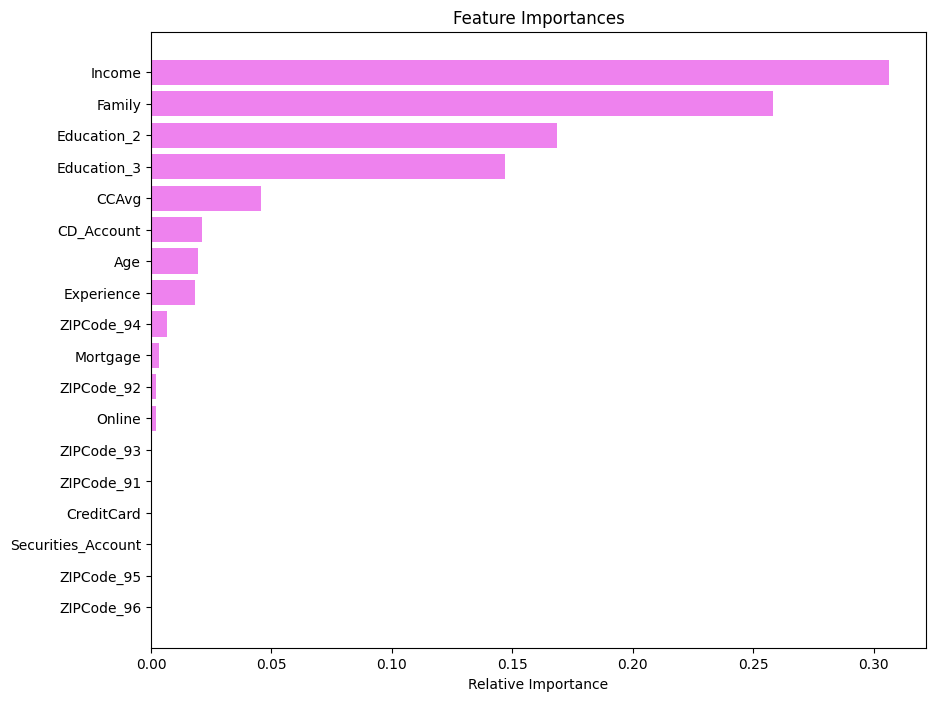

In [407]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income and Family are the topmost two important variables for predicting the customes's purchase of loan followed by Education_2,Education_3,CCAvg,CD_Account,Age,Experience.

## Decision Tree (with class_weights)

* If the frequency of class A is 9% and the frequency of class B is 91%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [408]:
model2 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training data



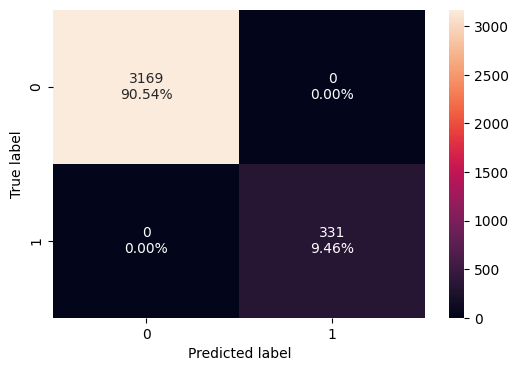

In [409]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [410]:
decision_tree_perf_train_withclasswight = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_perf_train_withclasswight

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test data


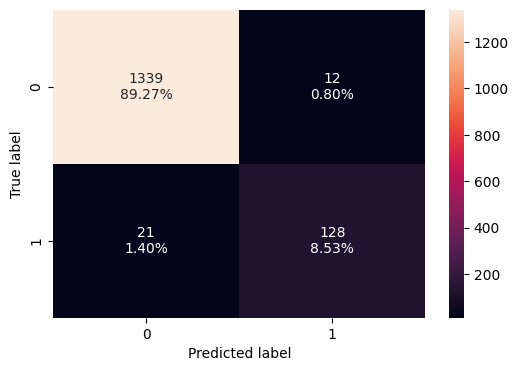

In [411]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [412]:
decision_tree_perf_test_withclasswight = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_perf_test_withclasswight

,Accuracy,Recall,Precision,F1
0,0.97800,0.85906,0.91429,0.88581


* There is a disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

## Model Performance Improvement

###Decision Tree (Pre-pruning)

In [413]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=3,
                       random_state=1)

####Checking performance on training data

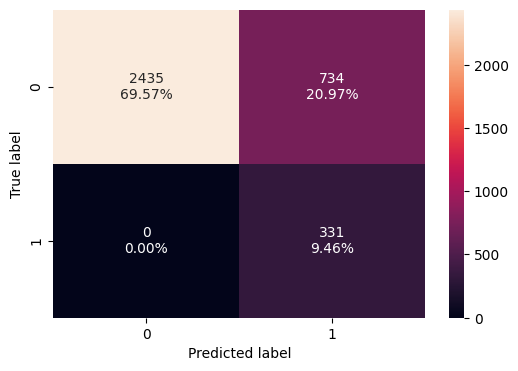

In [414]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [415]:
decision_tree_perf_train_tuned = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_perf_train_tuned

,Accuracy,Recall,Precision,F1
0,0.79029,1.00000,0.31080,0.47421


#### Visualizing the Decision Tree

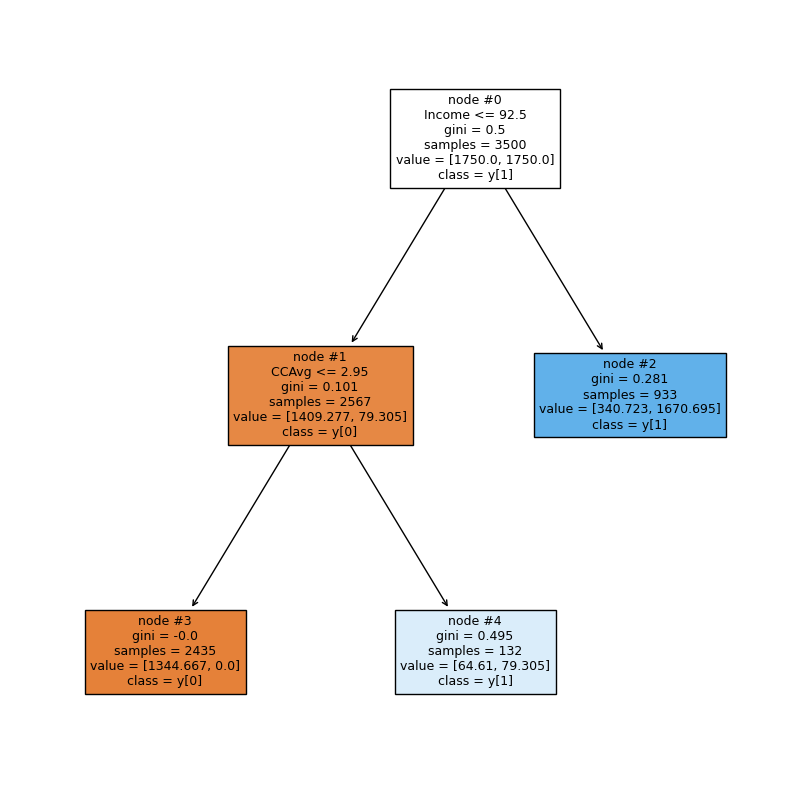

In [416]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [417]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- weights: [340.72, 1670.69] class: 1



####Let's find out important features in the tree building

In [418]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp
Income             0.92905
CCAvg              0.07095
Age                0.00000
ZIPCode_91         0.00000
Education_2        0.00000
ZIPCode_96         0.00000
ZIPCode_95         0.00000
ZIPCode_94         0.00000
ZIPCode_93         0.00000
ZIPCode_92         0.00000
CreditCard         0.00000
Experience         0.00000
Online             0.00000
CD_Account         0.00000
Securities_Account 0.00000
Mortgage           0.00000
Family             0.00000
Education_3        0.00000


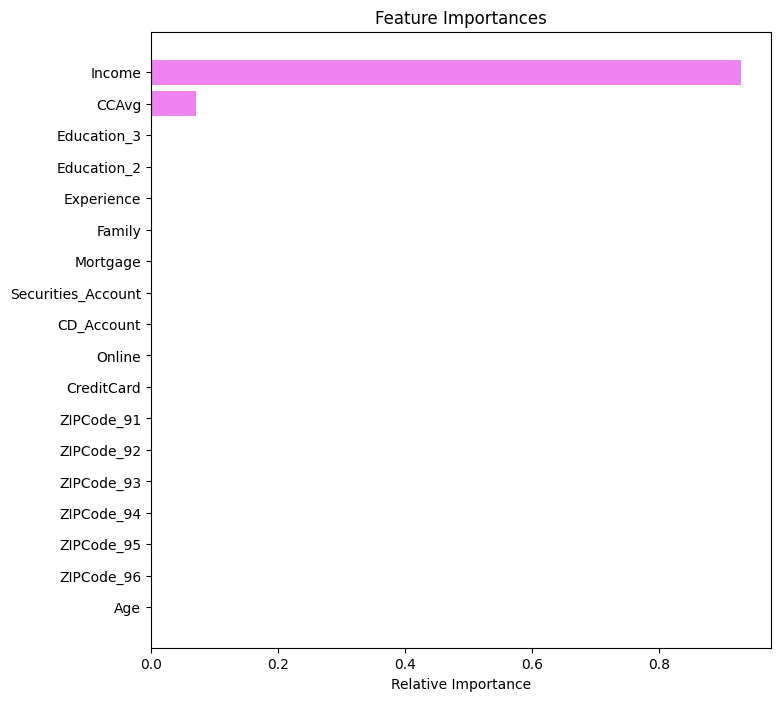

In [419]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to this descision tree Income and CCAvg are the most important features.

####Checking performance on test data

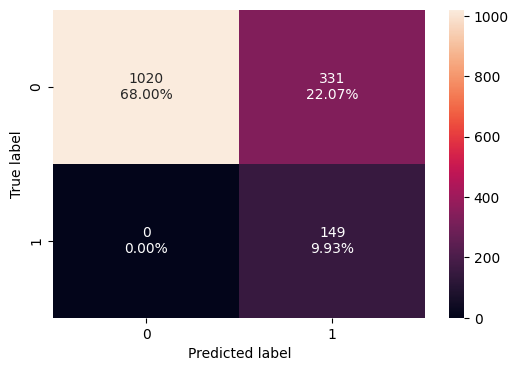

In [420]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [421]:
decision_tree_perf_test_tuned = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_perf_train_tuned

,Accuracy,Recall,Precision,F1
0,0.79029,1.00000,0.31080,0.47421


* The model is giving a perfect result now since the recall scores on both the train and test data are 1 which shows that the model is able to perform well on both seen and unseen data.
* Additionally we note that metrics for Accuracy,Prescision and F1 has reduced compared to previous models.

#### Descision Tree(Post_Pruning/Cost-Complexity Pruning)

**Total impurity of leaves vs effective alphas of pruned tree**

In [422]:
clf = DecisionTreeClassifier(random_state=1,class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities =abs(path.ccp_alphas), path.impurities

In [423]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,-0.00000
1,0.00000,-0.00000
2,0.00000,-0.00000
3,0.00000,-0.00000
4,0.00000,-0.00000
5,0.00000,-0.00000
6,0.00000,-0.00000
7,0.00000,-0.00000
8,0.00000,-0.00000
9,0.00000,-0.00000


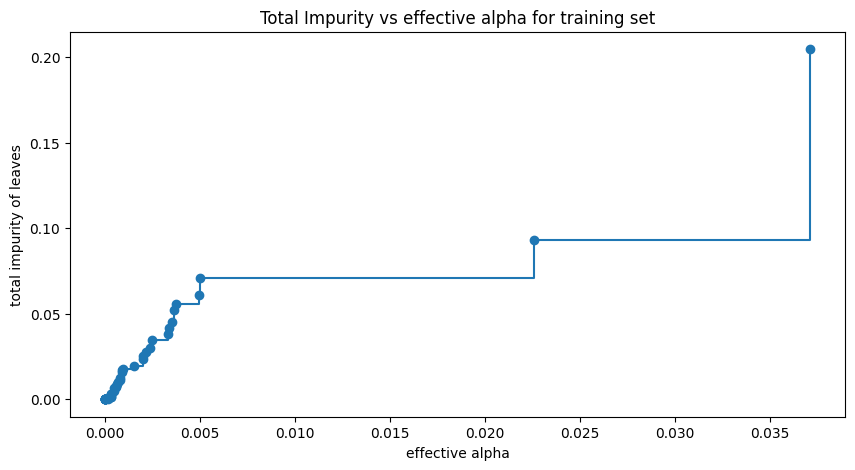

In [424]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [425]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight="balanced")
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923236


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

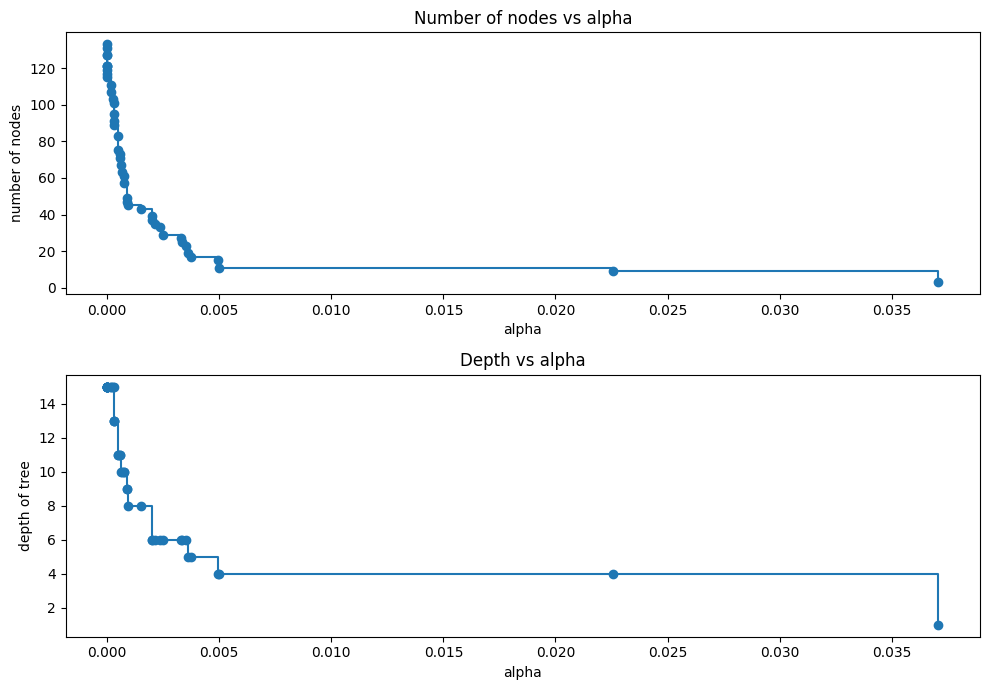

In [426]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [427]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [428]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

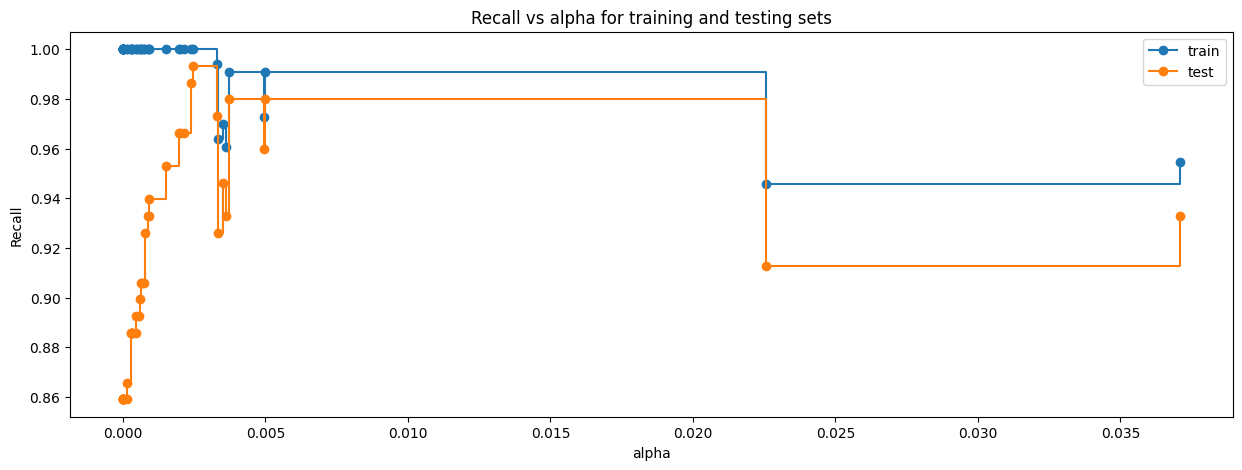

In [429]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [430]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0024726598786421958, class_weight='balanced',
                       random_state=1)


####Checking performance on training data

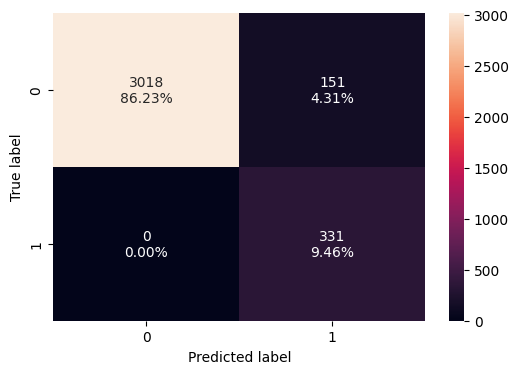

In [431]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [432]:
decision_tree_perf_train_postpruned = model_performance_classification_sklearn( best_model, X_train, y_train)
decision_tree_perf_train_postpruned

,Accuracy,Recall,Precision,F1
0,0.95686,1.00000,0.68672,0.81427


####Visualizing the Decision Tree

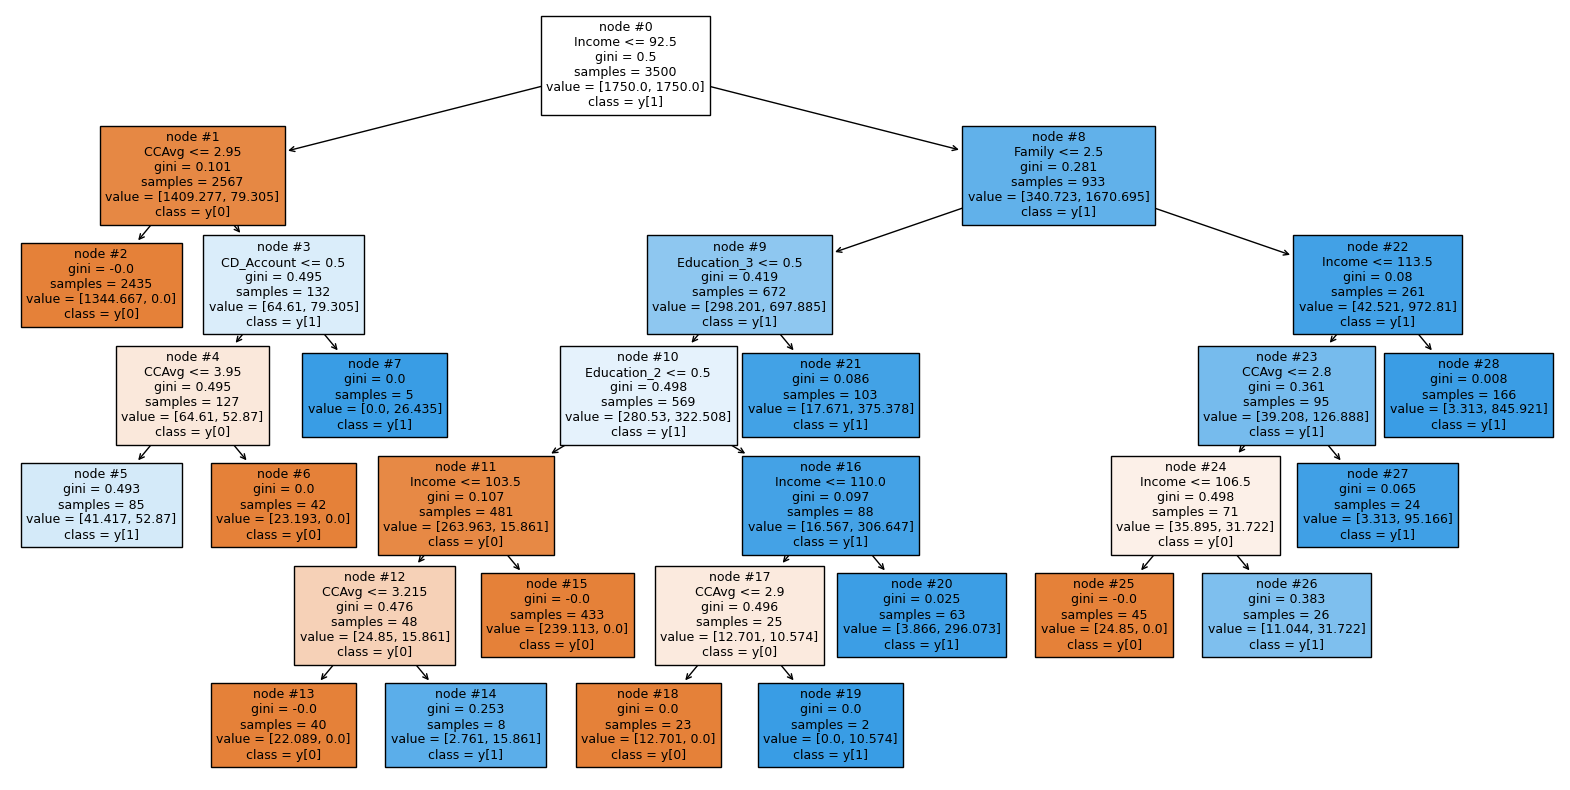

In [433]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [434]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights: [12

In [435]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp
Income             0.66884
Education_2        0.14661
CCAvg              0.08395
Education_3        0.05162
Family             0.04095
CD_Account         0.00802
ZIPCode_92         0.00000
ZIPCode_96         0.00000
ZIPCode_95         0.00000
ZIPCode_94         0.00000
ZIPCode_93         0.00000
Age                0.00000
ZIPCode_91         0.00000
Experience         0.00000
Online             0.00000
Securities_Account 0.00000
Mortgage           0.00000
CreditCard         0.00000


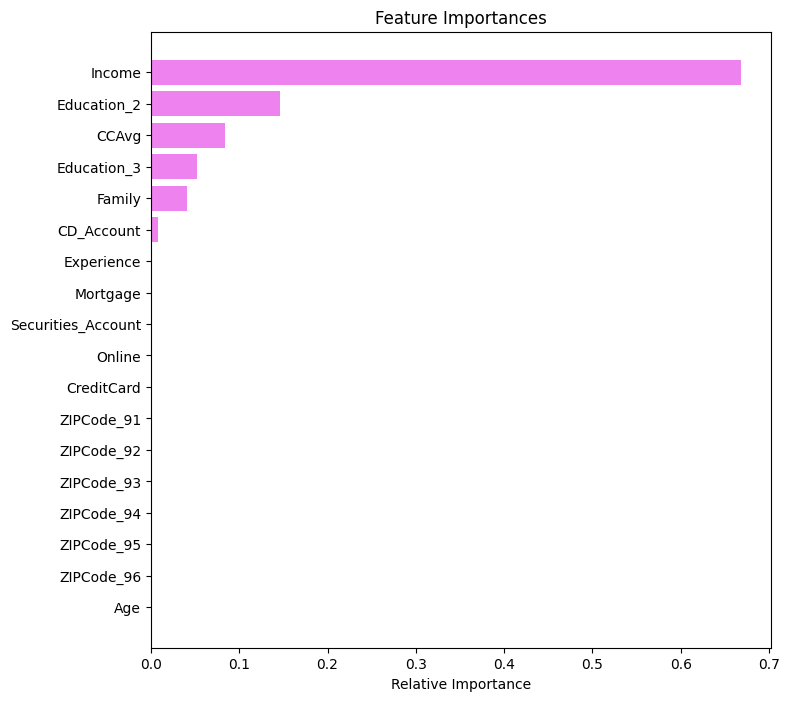

In [436]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to this model Income,Education_2(Graduate),Education_3(Advanced/Professional),Family,CCAvg are important features.

####Checking performance on test data

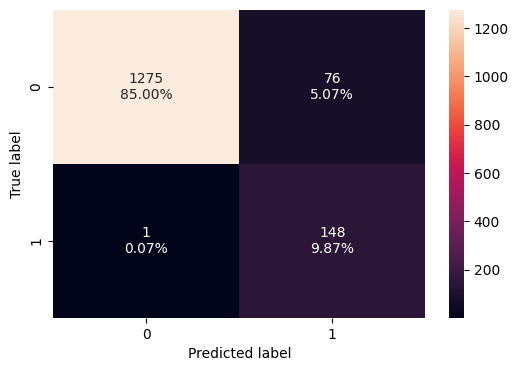

In [437]:
confusion_matrix_sklearn(best_model, X_test, y_test)


In [438]:
decision_tree_perf_test_postpruned = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_perf_test_postpruned

,Accuracy,Recall,Precision,F1
0,0.94867,0.99329,0.66071,0.79357


## Model Comparison and Final Model Selection

In [439]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_basicmodel.T,
        decision_tree_perf_train_withclasswight.T,
        decision_tree_perf_train_tuned.T,
        decision_tree_perf_train_postpruned.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree basic model",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree basic model,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00000,1.00000,0.79029,0.95686
Recall,1.00000,1.00000,1.00000,1.00000
Precision,1.00000,1.00000,0.31080,0.68672
F1,1.00000,1.00000,0.47421,0.81427


In [440]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_basicmodel.T,
        decision_tree_perf_test_withclasswight.T,
        decision_tree_perf_test_tuned.T,
        decision_tree_perf_test_postpruned.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree Basic-Model ",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree Basic-Model,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.98667,0.97800,0.77933,0.94867
Recall,0.91275,0.85906,1.00000,0.99329
Precision,0.95105,0.91429,0.31042,0.66071
F1,0.93151,0.88581,0.47377,0.79357


* Decision Tree Basic-Model and Decision Tree (Post-Pruning) both are giving  high recall scores on both training and test sets.
* However, we will choose the post-pruned tree as the best model since it is giving a slightly high recall score on the test sets than the basic-model tree and the differnce of the recall score of train and test data is less in post-prunned tree than the basic-model tree.

## Actionable Insights and Business Recommendations


* The model built can be used to predict if a customer will purchase personal loan or not and can correctly identify 99% of the loan purchase.
*  The most important attribute that our models tell us for determining who is most likely to purchase a loan is the customer's income.
* Other important attributes are
    * Credit Card Spending
    *  Size of family
    *  Education Level.

*  Customers with income less than 92.5 thousand dollars are likely to purchase loans only if their credit card spending is between 2.95 thousand dollars and 3.95 thousand dollars.
* Customers with a family size 3 or above and income greater than 106.5 thousand dollars are likely to purchase loans.
* Customers with a family size of 3 or above and income greater than 92.5 thousand dollars are likely to purchase loans if their average monthly credit card spending is above 2.8 thousand dollars.
* Customers with the highest educational qualifications are likely to purchase loans if their income is between 92.5 thousand dollars and 110 thousand dollars, the average monthly credit spending is higher than 2.9 thousand dollars and their family size is 2 or less.
*  Customers with undergraduate educational qualifications are likely to purchase loans; if their income is between 92.5 thousand dollars and 103.5 thousand dollars, the average monthly credit spending is higher than 3.215 thousand dollars and the size of the family is two or less.  


Based on the above insights the below recommendations is suggested to bank management:
* Model is tuned to provide us customers who will most likely purchase loans, but the model will not be able to predict the most likely time when the targetted maket ads for loans would be most efficent.
* Additional data which identifies patterns of customer behaviour with regards to making a finanical investment(/commitment) will help determine exact when and how the marketting team must target the customers.
